In [71]:
# Panutad Sirikul
# 650510714

### 1. Download the Adult Data Set(source: https://archive.ics.uci.edu/ml/datasets/Adult) from https://www2.cs.science.cmu.ac.th/courses/204371/

In [72]:
!pip install feature-engine

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import DecisionTreeDiscretiser

### 2. Investigate the dataset details from https://archive.ics.uci.edu/ml/datasets/Adult

In [74]:
data = pd.read_csv('adult.csv')

In [75]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [77]:
data.isnull().sum() # ตรวจสอบข้อมูลสูญหาย

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [78]:
data.duplicated().sum() # ตรวจสอบข้อมูลซ้ำซ้อน

24

In [79]:
data.shape # ตรวจสอบจำนวนแถวและคอลัมน์

(32561, 15)

### 3. Discretize the variable age

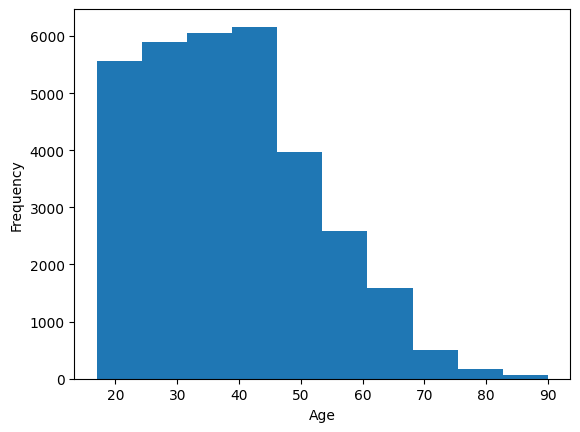

In [80]:
# Plot เพื่อดูการกระจายของอายุ
plt.hist(data['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [81]:
# ทำการแบ่งช่วงข้อมูลอายุให้เป็น 10 ช่วง
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
data['age_labeled'] = pd.cut(data['age'], bins=10, labels=age_labels)

In [82]:
data.head() # เกิดคอลัมน์ใหม่ age_labeled ซึ่งจะแบ่งช่วงของอายุได้ชัดเจนขึ้น

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_labeled
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,90-99
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,80-89
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,60-69
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,50-59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,30-39


### 4. Perform a feature scaling on the variable capital.gain and capital.loss

In [83]:
# Feature Scaling on variable capital.gain
# Standardization
data["capital.gain"] = (data["capital.gain"] - data["capital.gain"].mean()) / (data["capital.gain"].std())

# Max-min Normalization
data["capital.gain"] = (data["capital.gain"]-data["capital.gain"].min())/(data["capital.gain"].max()-data["capital.gain"].min())

In [84]:
data.head() # สังเกตการเปลี่ยนแปลงที่ capital.gain

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_labeled
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0.0,4356,40,United-States,<=50K,90-99
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356,18,United-States,<=50K,80-89
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0.0,4356,40,United-States,<=50K,60-69
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900,40,United-States,<=50K,50-59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,3900,40,United-States,<=50K,30-39


In [85]:
# Feature Scaling on variable capital.loss
# Standardization
data["capital.loss"] = (data["capital.loss"] - data["capital.loss"].mean()) / (data["capital.loss"].std())

# Max-min Normalization
data["capital.loss"] = (data["capital.loss"]-data["capital.loss"].min())/(data["capital.loss"].max()-data["capital.loss"].min())

In [86]:
data.head() # สังเกตการเปลี่ยนแปลงที่ capital.loss

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,age_labeled
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0.0,1.000000,40,United-States,<=50K,90-99
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,18,United-States,<=50K,80-89
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0.0,1.000000,40,United-States,<=50K,60-69
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,40,United-States,<=50K,50-59
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,0.895317,40,United-States,<=50K,30-39


### 5. Transform the value of the hours.per.week using log transformation

In [87]:
import scipy.stats as stats

from feature_engine. transformation import PowerTransformer

def diagnostic_plots(df, variable):
     plt.figure(figsize=(15,6))
     plt.subplot(1, 2, 1)
     df[variable].hist(bins=30)
     plt.subplot(1, 2, 2)
     stats.probplot(df[variable], dist="norm", plot=plt)
     plt.show()

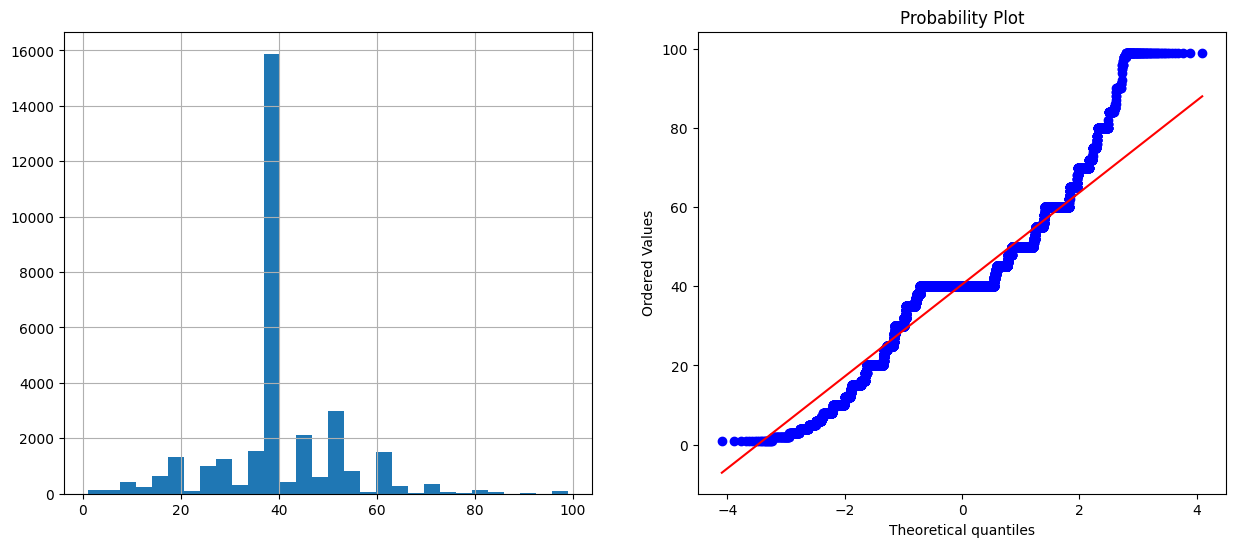

In [88]:
diagnostic_plots(data, 'hours.per.week') # ดูตัวแปร hours.per.week ก่อนทำการ Log Transformation

In [89]:
# Perform log transformation on the hours.per.week feature
data['hours.per.week'] = np.log(data['hours.per.week'])

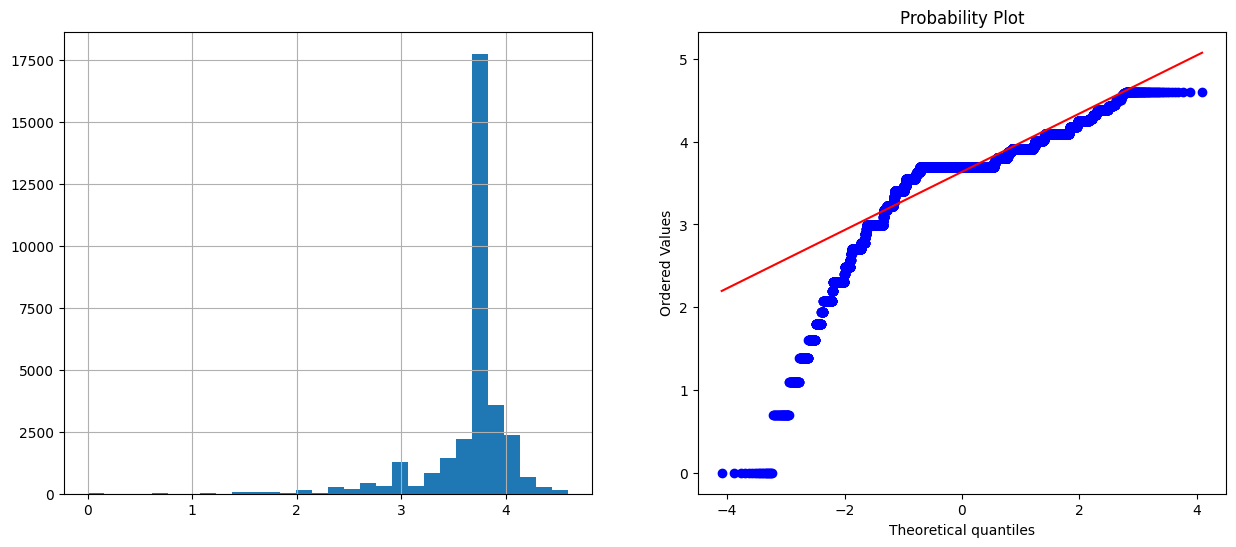

In [90]:
diagnostic_plots(data, 'hours.per.week') # หลังจากทำ Log Transformation

### 6. Encoding the variable education and sex

In [91]:
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder

In [92]:
# ดู Data Type ของ education และ sex ก่อน
data.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education.num        int64
marital.status      object
occupation          object
relationship        object
race                object
sex                 object
capital.gain       float64
capital.loss       float64
hours.per.week     float64
native.country      object
income              object
age_labeled       category
dtype: object

In [93]:
# education Encoding โดยวิธี One-Hot Encoding
edu_enc = OneHotEncoder(variables=["education"], drop_last=True)
edu_enc.fit(data)
data = edu_enc.transform(data)

In [94]:
# education Encoding โดยใช้วิธี Ordinal Encoding
# ทำการเตรียมเข้ารหัส โดยเรียงลำดับตามระดับการศึกษาจากต่ำสุดไปสูงสุด
#ordinal_mapping = {'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4,
#                   '9th': 5, '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9,
#                   'Some-college': 10, 'Assoc-voc': 11, 'Assoc-acdm': 12,
#                   'Prof-school': 13, 'Bachelors': 14, 'Masters': 15, 'Doctorate': 16}
#data["education"] = data["education"].map(ordinal_mapping)
#### ซ้ำกับ education.num ####

In [95]:
# sex Encoding โดยวิธี One-Hot Encoding
sex_enc = OneHotEncoder(variables=["sex"], drop_last=True)
sex_enc.fit(data)
data = sex_enc.transform(data)

In [96]:
data.head() # สังเกตว่าตัวแปร education กับ sex เข้ารหัสได้สำเร็จแล้ว

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,...,education_Bachelors,education_Masters,education_11th,education_Assoc-acdm,education_Assoc-voc,education_1st-4th,education_5th-6th,education_12th,education_9th,sex_Female
0,90,?,77053,9,Widowed,?,Not-in-family,White,0.0,1.000000,...,0,0,0,0,0,0,0,0,0,1
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,0.0,1.000000,...,0,0,0,0,0,0,0,0,0,1
2,66,?,186061,10,Widowed,?,Unmarried,Black,0.0,1.000000,...,0,0,0,0,0,0,0,0,0,1
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,0.0,0.895317,...,0,0,0,0,0,0,0,0,0,1
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,0.0,0.895317,...,0,0,0,0,0,0,0,0,0,1


### 7. Submit your program to assignment submission system (http://hw.cs.science.cmu.ac.th/)